In [1]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sbn
import tensorflow as tf
import numpy as np

/home/diogo/.virtualenvs/keras/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [24]:
with open('../generate/data.pkl', 'rb') as f:
    Dset = pickle.load(f)



In [26]:
Xtrain = Dset['Xtrain']
Xtest = Dset['Xtest']
Ytrain = Dset['Ytrain']
Ytest = Dset['Ytest']

_, H, W, D = Xtrain.shape
_, I, C = Ytrain.shape

print(Xtrain.shape, Ytrain.shape)

(12500, 50, 200, 3) (12500, 5, 36)


In [138]:
tf.reset_default_graph()


tfxin = tf.layers.Input(shape=[H, W, D], dtype=np.float32)
tfyin = tf.layers.Input(shape=[I, C], dtype=np.int8)
tfistrain = tf.placeholder(shape=[], dtype=np.bool)

tfconv = tf.layers.conv2d(tfxin, 6, 5, strides=(1, 1), padding='same', activation=tf.nn.relu, use_bias=True)

tfconv = tf.layers.conv2d(tfconv, 12, 5, strides=(2, 2), padding='same', activation=tf.nn.relu, use_bias=True)

tfconv = tf.layers.conv2d(tfconv, 24, 4, strides=(2, 2), padding='same', activation=tf.nn.relu, use_bias=True)


tfxflat = tf.layers.flatten(tfconv)

tfxflat = tf.layers.dropout(tfxflat, rate=0.5, training=tfistrain)

tfxflat = tf.layers.dense(tfxflat, 1000, activation=tf.nn.relu, use_bias=True)

tfxflat = tf.layers.dropout(tfxflat, rate=0.5, training=tfistrain)


tfylogit = [tf.layers.dense(tfxflat, C, activation=None, use_bias=True) for _ in range(5)]
tfypred = list(map(tf.nn.softmax, tfylogit))

tfaccuracy = []
tfxentropy = []
tfnacc = []
tfcorrectpreds = []
for i in range(5):
    tfytrue = tfyin[:, i, :]

    tfcorrect = tf.equal(tf.argmax(tfypred[i], 1), tf.argmax(tfytrue, 1))
    tfcorrectpreds.append(tfcorrect)
    
    tfnacc.append(tf.reduce_sum(tf.cast(tfcorrect, tf.int8)))
    tfaccuracy.append(tf.reduce_mean(tf.cast(tfcorrect, tf.float32)))
    tfxentropy.append(tf.nn.softmax_cross_entropy_with_logits_v2(logits=tfylogit[i], labels=tfytrue))


    
tfpacc = tf.reduce_prod(tfaccuracy)

tfwacc = tf.reduce_mean(tf.cast(tf.reduce_all(tfcorrectpreds, axis=0), tf.float32))


tfloss = sum(list(map(tf.reduce_mean, tfxentropy)))
train = tf.train.AdamOptimizer(0.001).minimize(tfloss)


sess = tf.Session()
with sess.as_default():
    init = tf.global_variables_initializer()
    sess.run(init)

In [143]:

for _ in range(5):
    with sess.as_default():
        for _ in range(30):
            ids = np.random.choice(Xtrain.shape[0], 200)
            _, acc, loss = sess.run([train, tfaccuracy, tfloss], feed_dict={tfxin: Xtrain[ids], tfyin: Ytrain[ids], tfistrain: True})
            #print(acc, loss)

        acc, loss, p, w = sess.run([tfaccuracy, tfloss, tfpacc, tfwacc], feed_dict={tfxin: Xtest[:1000], tfyin: Ytest[:1000], tfistrain: False})
        print(acc, loss, p, w)

[0.994, 0.924, 0.838, 0.836, 0.886] 1.8035128 0.5700886 0.658
[0.997, 0.931, 0.855, 0.837, 0.885] 1.6954831 0.5878678 0.667
[0.996, 0.931, 0.853, 0.846, 0.882] 1.6658592 0.590197 0.667
[0.995, 0.924, 0.856, 0.853, 0.888] 1.5796789 0.59611607 0.686
[0.994, 0.94, 0.857, 0.856, 0.893] 1.5289131 0.612097 0.699


In [36]:
Ytrain[[1]].shape

(1, 5, 36)

In [83]:
tfconv2.shape

TensorShape([Dimension(None), Dimension(25), Dimension(100), Dimension(6)])

In [84]:
tfxflat.shape

TensorShape([Dimension(None), Dimension(15000)])

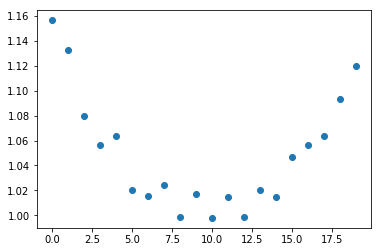

In [136]:
ffx = np.arange(20)
ffy = np.ones([20]) - 0.04 * (np.random.random([20]) - 0.5)+ ((ffx-10)*(ffx-10))/(15*15*3)

plt.plot(ffx, ffy, 'o')

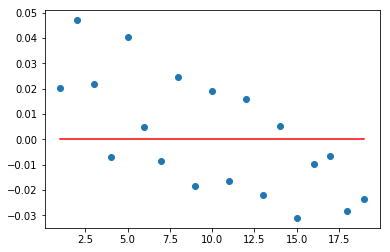

In [137]:
plt.plot(ffx[1:], (ffy[:-1] - ffy[1:])/ffy[:-1], 'o')
plt.plot(ffx[1:], np.zeros(ffx[1:].shape), '-r')